#📌 Extracción

In [13]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [14]:
#Extraccion de datos
url = 'https://raw.githubusercontent.com/migueloropeza/Challenge-Telecom-X-Parte1/refs/heads/main/TelecomX_Data.json'
result = requests.get(url)
data = result.json()

In [15]:
#Convercion de datos a un DataFrame
datos =  pd.json_normalize(data)
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

In [17]:
#Reemplazmos los vacios de la columna Total por 0
datos['account.Charges.Total'] = datos['account.Charges.Total'].replace(' ', 0)

In [18]:
#Transformacion de la columna Total a float
datos['account.Charges.Total'] = datos['account.Charges.Total'].astype(float)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [19]:
#Transformaicon de las cadenas a minusculas
columnas_str=['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService',
            'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract',
            'account.PaperlessBilling','account.PaymentMethod']
for i in columnas_str:
  datos[i]=datos[i].str.lower()

datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [23]:
#Trasnformacion de columnas binarias yes y no en 1 y 0 respectivamente
columnas_bin=['Churn','customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']
datos.loc[:,columnas_bin] = datos.loc[:,columnas_bin].replace({'yes':1,'no':0, '':0})
datos.tail()

/tmp/ipython-input-864798933.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.loc[:,columnas_bin] = datos.loc[:,columnas_bin].replace({'yes':1,'no':0, '':0})


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,0,female,0,0,0,13,1,no,dsl,...,no,no,yes,no,no,one year,0,mailed check,55.15,742.90
7263,9992-RRAMN,1,male,0,1,0,22,1,yes,fiber optic,...,no,no,no,no,yes,month-to-month,1,electronic check,85.10,1873.70
7264,9992-UJOEL,0,male,0,0,0,2,1,no,dsl,...,yes,no,no,no,no,month-to-month,1,mailed check,50.30,92.75
7265,9993-LHIEB,0,male,0,1,1,67,1,no,dsl,...,no,yes,yes,no,yes,two year,0,mailed check,67.85,4627.65
7266,9995-HOTOH,0,male,0,1,1,63,0,no phone service,dsl,...,yes,yes,no,yes,yes,two year,0,electronic check,59.00,3707.60


In [24]:
#Columnas binarias a tipo int
datos[columnas_bin] = datos[columnas_bin].astype(int)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [25]:
#Creacion de la columna ingresos por dia
datos['account.Charges.Daily'] = round(datos['account.Charges.Monthly']/30, 2)
datos.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
4723,6475-VHUIZ,0,female,0,1,0,23,1,no,dsl,...,yes,yes,no,no,month-to-month,0,electronic check,54.25,1221.55,1.81
3234,4518-FZBSX,0,male,0,1,1,42,1,no,no,...,no internet service,no internet service,no internet service,no internet service,one year,0,mailed check,20.25,854.90,0.68
1914,2706-QZIHY,0,female,0,1,0,15,1,yes,no,...,no internet service,no internet service,no internet service,no internet service,two year,0,mailed check,25.20,387.90,0.84
3579,4929-XIHVW,0,male,1,1,0,2,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,credit card (automatic),95.50,181.65,3.18
4257,5850-BDWCY,0,female,0,0,0,6,1,no,no,...,no internet service,no internet service,no internet service,no internet service,month-to-month,0,mailed check,20.20,123.65,0.67
3209,4480-QQRHC,0,female,1,0,0,8,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,bank transfer (automatic),74.05,600.15,2.47
5821,7966-YOTQW,0,male,0,0,0,10,1,yes,dsl,...,no,no,no,no,month-to-month,1,credit card (automatic),54.50,568.20,1.82
7078,9746-YKGXB,0,male,0,1,1,52,0,no phone service,dsl,...,yes,no,no,yes,one year,0,bank transfer (automatic),44.25,2276.10,1.48
3592,4948-WBBKL,0,female,1,0,0,36,1,yes,fiber optic,...,no,no,no,no,month-to-month,1,bank transfer (automatic),74.90,2659.45,2.50
5757,7868-BGSZA,0,male,0,1,0,43,1,yes,dsl,...,yes,no,yes,yes,one year,1,electronic check,80.20,3581.60,2.67


In [26]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [27]:
#Analisis descriptivo de los datos
datos.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [28]:
#Analisis derscriptivo de columnas categoricas
datos.describe(include='all')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
count,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,7267,7267,7267,7267,7267,7267.000000,7267,7267.000000,7267.000000,7267.000000
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,male,NaN,NaN,NaN,NaN,NaN,no,fiber optic,...,no,no,no,no,month-to-month,NaN,electronic check,NaN,NaN,NaN
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,3195,3582,2896,2870,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.257190,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,64.720098,2277.182035,2.157292
std,NaN,0.437115,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,30.129572,2268.648587,1.004407
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.610000
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.425000,396.200000,1.180000
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.300000,1389.200000,2.340000
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.875000,3778.525000,2.995000


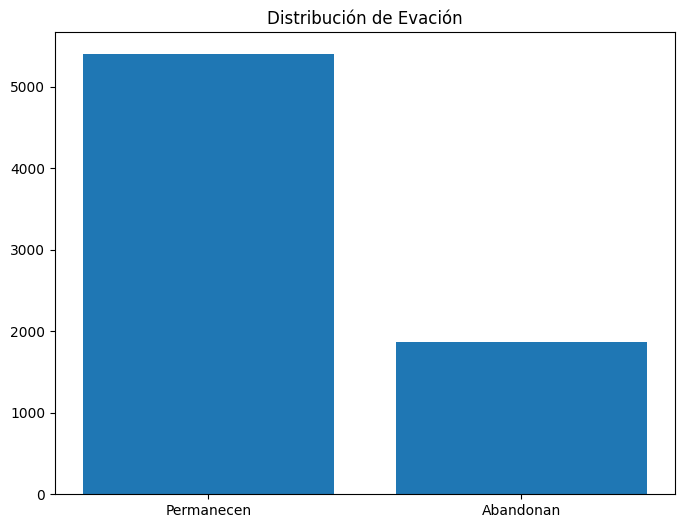

In [29]:
#Distribucion de evasión
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Permanecen', 'Abandonan'], datos['Churn'].value_counts())
ax.set_title('Distribución de Evación')
plt.show()

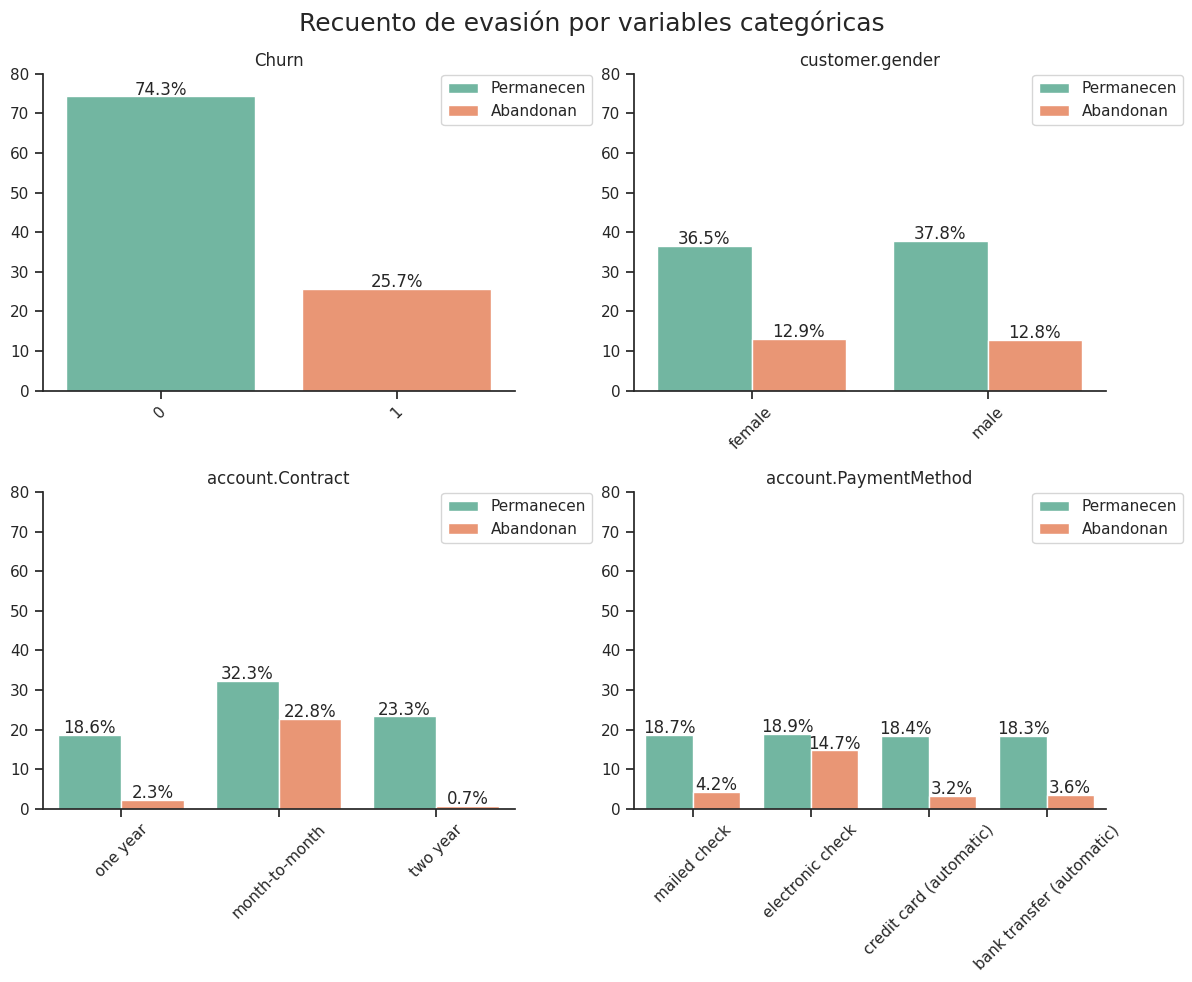

In [37]:
import seaborn as sns

var_cat = ['Churn','customer.gender','account.Contract', 'account.PaymentMethod']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Recuento de evasión por variables categóricas', fontsize = 18)

for i, var in enumerate(var_cat):
  row = i // 2
  col = i % 2
  ax = axs[row, col]
  sns.countplot(data=datos, x=var, hue='Churn', stat='percent', ax=ax, palette='Set2')
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}')
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0, 80)
  ax.tick_params(axis='x', rotation=45)
  ax.legend(['Permanecen', 'Abandonan'], bbox_to_anchor=(1.18, 1.02))

  for p in ax.patches:
    if p.get_height() > 0:
      ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

#📄Informe final

## Analisis
### 📉 Pérdida de Clientes

- Se confirma una pérdida cercana al 26% de clientes recurrentes, lo que representa una tasa significativa de cancelación que debe ser abordada con prioridad.
- La lealtad de los clientes aumenta con el tiempo, por lo que es crítico focalizar estrategias de retención en los primeros meses de contratación.

### 📃 Tipo de Contrato y Pago

- Clientes con contratos mensuales presentan la tasa de cancelación más alta, reflejando un menor compromiso comparado con contratos a largo plazo.

- Los métodos de pago manuales, especialmente el cheque electrónico, se asocian a mayor cancelación, mientras que los pagos automáticos correlacionan con menor tasa de abandono, posiblemente por conveniencia o menor fricción operativa.

- La factura electrónica parece estar asociada a un cliente más digital y crítico, con menor lealtad percibida.

### 🧪 Conclusiones y Recomendaciones

- Enfocar estrategias de retención temprana, especialmente en los primeros meses de contratación.

- Promover contratos a largo plazo y métodos de pago automáticos como parte de la experiencia del cliente.

- Desarrollar ofertas específicas y comunicaciones dirigidas a clientes solitarios, de mayor edad o con bajo uso del servicio.

- Revisar la propuesta de valor para clientes con alto gasto para asegurar que perciben beneficios acordes al costo.
